In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'E:\Python\NLP\CampusX\spam.csv', encoding = 'latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data Cleaning
# EDA
# Text Preprocesing
# Model Building
# Evaluation
# Improvement
# Website
# Deploy

# 1. Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
# drop last 3 cols as they contain NaN values more
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [5]:
df.sample(5)

,v1,v2
2236,ham,Pls tell nelson that the bb's are no longer co...
4104,ham,Jus finish my lunch on my way home lor... I to...
4965,spam,URGENT! We are trying to contact U. Todays dra...
1049,spam,18 days to Euro2004 kickoff! U will be kept in...
69,ham,I plane to give on this month end.


In [6]:
# rename col names
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# encode ham as 0 and spam as 1 rthrough label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [8]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
# dupliacte values
df.duplicated().sum()

403

In [11]:
df.drop_duplicates(keep='first', inplace=True)
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.duplicated().sum()

0

# 2. Exploratory Data Analysis(EDA)

In [13]:
# Check percentage of spam and ham
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [ ]:
# pip install matplotlib

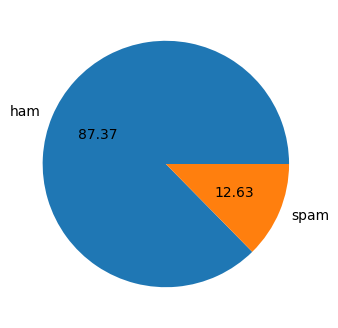

In [14]:
# visual representation of spam and ham
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct="%0.2f")
plt.show()


# Data is imbalanced

In [15]:
# use of nltk for tokenization of characters, words and sentences 
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# count the number of characters, words, sentences in the text and put it in different columns

# number of characters

df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [19]:
df['num_characters'] = df['text'].apply(len)

In [20]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
# number of words
df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [22]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
# number of sentences
df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [25]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
# Describe all the columns in the dataframe

df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# We can analyse ham and spam separately
# for ham messages
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# for spam messages
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
# pip install seaborn

In [30]:
# analyse through plotting as graph

import seaborn as sns

In [31]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

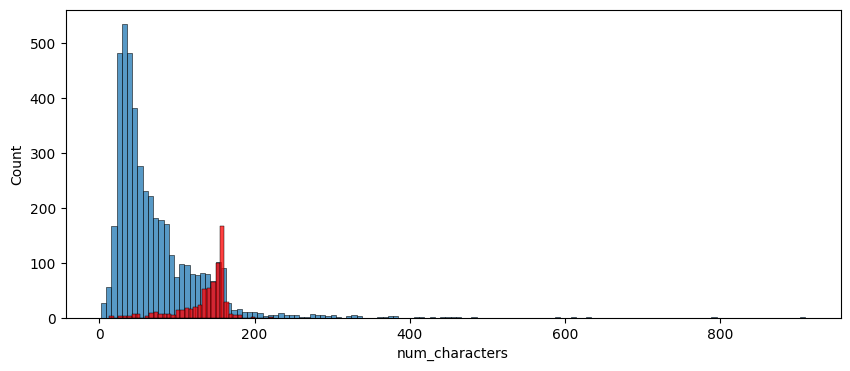

In [32]:
# plotting num_characters for both ham and spam

plt.figure(figsize=(10, 4))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

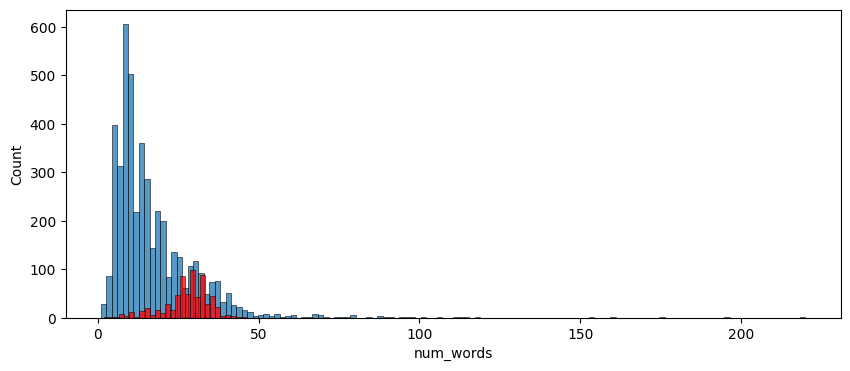

In [33]:
# plotting num_words for both ham and spam

plt.figure(figsize=(10, 4))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

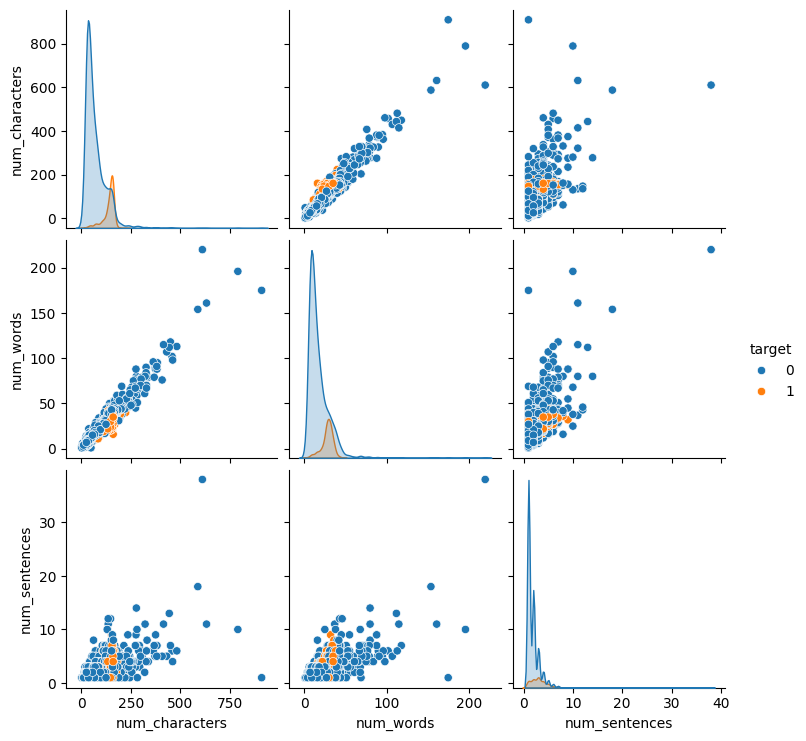

In [34]:
sns.pairplot(df, hue='target')

# from the visualisation we can find that there are some outliers in our data

In [35]:
# pierson correlation coefficient

df.select_dtypes(include='number').corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<AxesSubplot:>

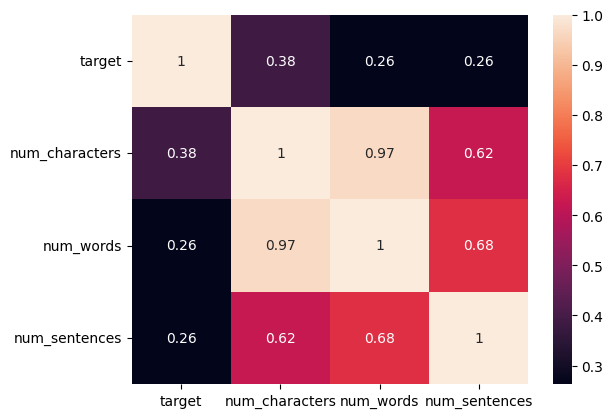

In [36]:
# Creating a heat map

sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

# 3. Data Preprocessing

###### - Lowercae
###### - Tokenization
###### - Removing special character
###### - Removing stopwords and punctuation
###### - Stemming

In [37]:
import re
import string
punctn = string.punctuation

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [39]:
# Creating a function to pre-process the text
def preprocess_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(punctn), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in word_tokenize(text) if word not in stopwords.words('english')]
    text = [ps.stem(word) for word in text]
    return ' '.join(text)

In [40]:
df['processed_text'] = df['text'].apply(preprocess_text)

In [41]:
df.head()

,target,text,num_characters,num_words,num_sentences,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt may ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [ ]:
# wordcloud helps to visualize the most frequent word in the corpus
!pip install wordcloud 

In [44]:
# Creating a worldcloud to visualize the most frequent words

from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

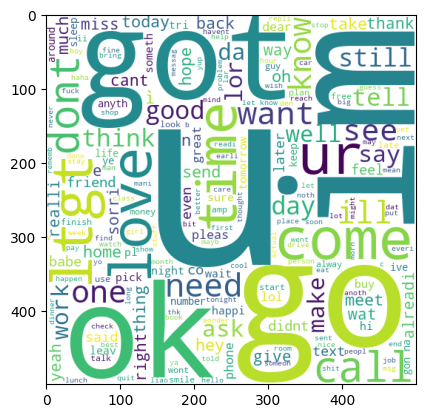

In [45]:
# showing ham messages
ham_wc = wc.generate(df[df['target'] == 0]['processed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

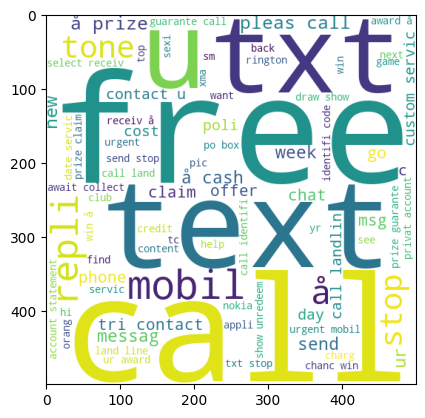

In [46]:
# showing spam messages
spam_wc = wc.generate(df[df['target'] == 1]['processed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [47]:
# showing top 30 words in ham messages

ham_corpus = []
for msg in df[df['target'] == 0]['processed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

        
len(ham_corpus)

35974

In [48]:
ham_corpus[:10]

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la']

In [49]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,878
1,im,435
2,go,401
3,get,352
4,come,272
5,ltgt,254
6,ok,246
7,dont,242
8,got,237
9,like,232


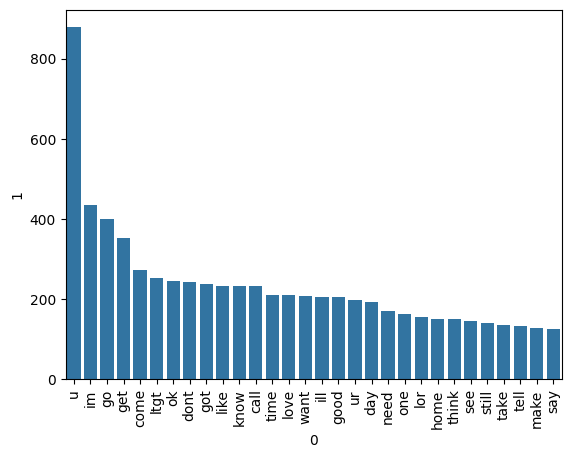

In [50]:
# showing this as barplot
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [51]:
# showing top 30 words in spam messages


spam_corpus = []
for msg in df[df['target'] == 1]['processed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

        
len(spam_corpus)

8566

In [52]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,321
1,å£,239
2,free,189
3,txt,137
4,u,123
5,text,121
6,ur,119
7,mobil,114
8,stop,103
9,repli,100


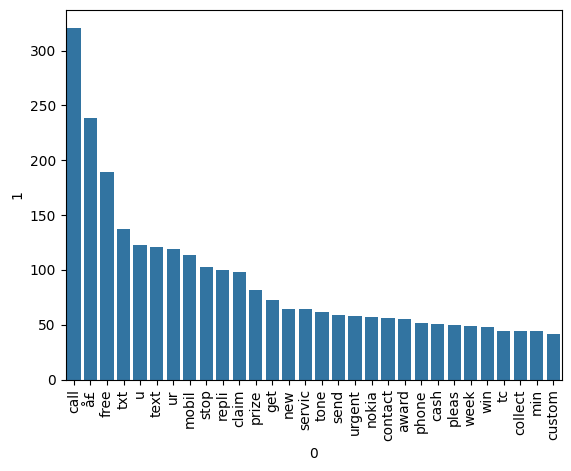

In [53]:
# showing this as barplot
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

#### vectorization(Bag of Words)

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['processed_text']).toarray()
X.shape


(5169, 6740)

In [55]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [57]:
# importing naive bayes algorithms

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [58]:
# Gaussian Naive Bayes

gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.8752417794970987
[[792 104]
 [ 25 113]]
0.5207373271889401


In [59]:
# Multinomilal Naive Bayes

mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9468085106382979
[[857  39]
 [ 16 122]]
0.7577639751552795


In [60]:
# Bernoulli Naive Bayes

bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.9671179883945842
[[889   7]
 [ 27 111]]
0.940677966101695


#### Vectorization(TfIdf)

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
Xt = tfidf.fit_transform(df['processed_text']).toarray()
Xt.shape

(5169, 6740)

In [62]:
yt = df['target'].values
yt

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
# train test split
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size = 0.2, random_state = 0)

In [64]:
# Gaussian naive bayes on TfIdf

gnb.fit(Xt_train, yt_train)
yt_pred_gnb = gnb.predict(Xt_test)
print(accuracy_score(yt_test, yt_pred_gnb))
print(confusion_matrix(yt_test, yt_pred_gnb))
print(precision_score(yt_test, yt_pred_gnb))


0.8684719535783365
[[778 107]
 [ 29 120]]
0.5286343612334802


In [65]:
# Mutinomial naive bayes on TfIdf

mnb.fit(Xt_train, yt_train)
yt_pred_mnb = mnb.predict(Xt_test)
print(accuracy_score(yt_test, yt_pred_mnb))
print(confusion_matrix(yt_test, yt_pred_mnb))
print(precision_score(yt_test, yt_pred_mnb))


0.9487427466150871
[[885   0]
 [ 53  96]]
1.0


In [66]:
# Bernoulli naive bayes on TfIdf

bnb.fit(Xt_train, yt_train)
yt_pred_bnb = bnb.predict(Xt_test)
print(accuracy_score(yt_test, yt_pred_bnb))
print(confusion_matrix(yt_test, yt_pred_bnb))
print(precision_score(yt_test, yt_pred_bnb))

0.9613152804642167
[[877   8]
 [ 32 117]]
0.936


Trying RandomForestClassifier, and looking for any improvement in our accuracy and precession

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [69]:
# RandomForestClassifier with TfIdf

rfc.fit(Xt_train, yt_train)
yt_pred_rfc = rfc.predict(Xt_test)
print(accuracy_score(yt_test, yt_pred_rfc))
print(confusion_matrix(yt_test, yt_pred_rfc))
print(precision_score(yt_test, yt_pred_rfc))

0.9729206963249516
[[885   0]
 [ 28 121]]
1.0


Here Tfidf is working more efficiently than BagofWords, in case of Multinomial,   
So both Mutinomial and Bernoulli are working good but Precision is more important than accuracy,    hence i will go with Multinomial Naive bayes

In [ ]:
pip install xgboost

In [76]:
# Now we will compare the precision score of all the models from sklearn and other
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [77]:
# creating objects for each algorithm
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [78]:
# Creating a dictionary of all the models

clfs = { 'SVC' : svc,
         'KN' : knc, 
         'NB': mnb,
         'DT': dtc, 
         'LR': lrc, 
         'RF': rfc, 
         'AdaBoost': abc, 
         'BgC': bc, 
         'ETC': etc,
         'GBDT':gbdt,
         'xgb':xgb
        }

In [79]:
# Creating function for all the models, which can be run by using any of the above models
# Here am using Xt because it is TfIdf vectorizer and we have mention it in the code above
def train_classifier(clf,Xt_train,yt_train,Xt_test,yt_test):
    clf.fit(Xt_train, yt_train)
    yt_pred = clf.predict(Xt_test)
    accuracy = accuracy_score(yt_test,yt_pred)
    precision = precision_score(yt_test,yt_pred)
    
    return accuracy, precision

In [80]:
train_classifier(svc, Xt_train,yt_train,Xt_test,yt_test)

(0.9700193423597679, 0.9758064516129032)

In [88]:
# checking accuracy and precission score of all the models

accuracy_scores = []
precision_scores = []

for name,model in clfs.items():
    current_accuracy,current_precision = train_classifier(model,Xt_train,yt_train,Xt_test,yt_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9700193423597679
Precision -  0.9758064516129032
For  KN
Accuracy -  0.9110251450676983
Precision -  1.0
For  NB
Accuracy -  0.9487427466150871
Precision -  1.0
For  DT
Accuracy -  0.937137330754352
Precision -  0.8559322033898306
For  LR
Accuracy -  0.960348162475822
Precision -  0.9736842105263158
For  RF
Accuracy -  0.9729206963249516
Precision -  1.0


C:\Users\ACER\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9666666666666667
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8865248226950354
For  ETC
Accuracy -  0.971953578336557
Precision -  0.9838709677419355
For  GBDT
Accuracy -  0.9545454545454546
Precision -  0.9811320754716981
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.992


In [89]:
# Putting all the outputs above in a dataframe

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.911025,1.000000
2,NB,0.948743,1.000000
5,RF,0.972921,1.000000
10,xgb,0.974855,0.992000
8,ETC,0.971954,0.983871
9,GBDT,0.954545,0.981132
0,SVC,0.970019,0.975806
4,LR,0.960348,0.973684
6,AdaBoost,0.964217,0.966667
7,BgC,0.961315,0.886525


In [90]:
# converting the above dataframe to long format, so that it can be plotted

performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.911025
1,NB,Accuracy,0.948743
2,RF,Accuracy,0.972921
3,xgb,Accuracy,0.974855
4,ETC,Accuracy,0.971954
5,GBDT,Accuracy,0.954545
6,SVC,Accuracy,0.970019
7,LR,Accuracy,0.960348
8,AdaBoost,Accuracy,0.964217
9,BgC,Accuracy,0.961315


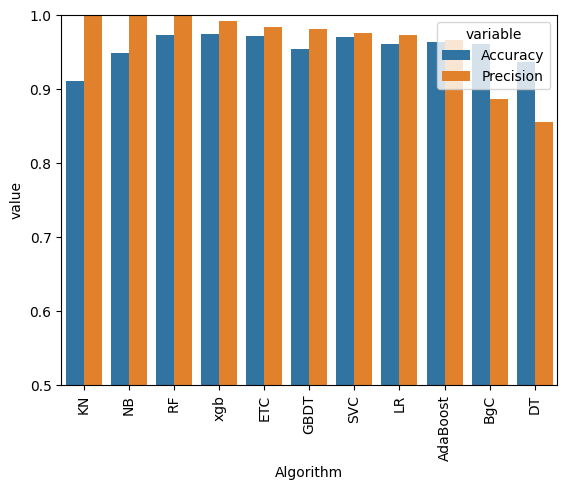

In [91]:
sns.barplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

### Model improvement

In [70]:
# Changing the max_features feature in TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
Xt3 = tfidf.fit_transform(df['processed_text']).toarray()
Xt3.shape

(5169, 3000)

In [71]:
yt3 = df['target'].values
yt3

array([0, 0, 1, ..., 0, 0, 0])

In [72]:
# train test split
from sklearn.model_selection import train_test_split
Xt3_train, Xt3_test, yt3_train, yt3_test = train_test_split(Xt3, yt3, test_size = 0.2, random_state = 0)

In [73]:
# creating the same function again with updated parameters of X and y
def train_classifier_3(clf,Xt3_train,yt3_train,Xt3_test,yt3_test):
    clf.fit(Xt3_train, yt3_train)
    yt3_pred = clf.predict(Xt3_test)
    accuracy = accuracy_score(yt3_test,yt3_pred)
    precision = precision_score(yt3_test,yt3_pred)
    
    return accuracy, precision

In [74]:
# as we have alredy vectorized the data, so now we can use the same models we have called above and the same function
# for eg:
train_classifier_3(rfc, Xt3_train,yt3_train,Xt3_test,yt3_test)

(0.9748549323017408, 1.0)

In [81]:
accuracy_scores = []
precision_scores = []

for name,model in clfs.items():
    
    current_accuracy,current_precision = train_classifier_3(model, Xt3_train,yt3_train,Xt3_test,yt3_test)
    
    print("For ",name)
    print("Accuracy_max_ft_3000 - ",current_accuracy)
    print("Precision_max_ft_3000 - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy_max_ft_3000 -  0.9729206963249516
Precision_max_ft_3000 -  0.9763779527559056
For  KN
Accuracy_max_ft_3000 -  0.9148936170212766
Precision_max_ft_3000 -  1.0
For  NB
Accuracy_max_ft_3000 -  0.9671179883945842
Precision_max_ft_3000 -  1.0
For  DT
Accuracy_max_ft_3000 -  0.9400386847195358
Precision_max_ft_3000 -  0.865546218487395
For  LR
Accuracy_max_ft_3000 -  0.9622823984526112
Precision_max_ft_3000 -  0.9741379310344828
For  RF
Accuracy_max_ft_3000 -  0.9748549323017408
Precision_max_ft_3000 -  1.0


C:\Users\ACER\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy_max_ft_3000 -  0.960348162475822
Precision_max_ft_3000 -  0.9285714285714286
For  BgC
Accuracy_max_ft_3000 -  0.9555125725338491
Precision_max_ft_3000 -  0.8601398601398601
For  ETC
Accuracy_max_ft_3000 -  0.9729206963249516
Precision_max_ft_3000 -  0.9618320610687023
For  GBDT
Accuracy_max_ft_3000 -  0.9555125725338491
Precision_max_ft_3000 -  0.963963963963964
For  xgb
Accuracy_max_ft_3000 -  0.9748549323017408
Precision_max_ft_3000 -  0.992


In [82]:
# Putting all the outputs above in a 2nd dataframe

performance_df2 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
performance_df2

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.914894,1.000000
2,NB,0.967118,1.000000
5,RF,0.974855,1.000000
10,xgb,0.974855,0.992000
0,SVC,0.972921,0.976378
4,LR,0.962282,0.974138
9,GBDT,0.955513,0.963964
8,ETC,0.972921,0.961832
6,AdaBoost,0.960348,0.928571
3,DT,0.940039,0.865546


In [100]:
# Appending both dataframes
performance_df = performance_df.merge(performance_df2,on='Algorithm')
performance_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.911025,1.000000,0.914894,1.000000
1,NB,0.948743,1.000000,0.967118,1.000000
2,RF,0.972921,1.000000,0.974855,1.000000
3,xgb,0.974855,0.992000,0.974855,0.992000
4,ETC,0.971954,0.983871,0.972921,0.961832
5,GBDT,0.954545,0.981132,0.955513,0.963964
6,SVC,0.970019,0.975806,0.972921,0.976378
7,LR,0.960348,0.973684,0.962282,0.974138
8,AdaBoost,0.964217,0.966667,0.960348,0.928571
9,BgC,0.961315,0.886525,0.955513,0.860140


#### Applying SCALING

In [101]:
# applying scaling on the data for better results

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Xs = tfidf.fit_transform(df['processed_text']).toarray()
Xs = scaler.fit_transform(Xs)
Xs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [102]:
ys = df['target'].values

In [103]:
# train test split

from sklearn.model_selection import train_test_split
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size = 0.2, random_state = 0)

In [104]:
# again creating the same function with updated parameters of X and y

def train_classifier_s(clf,Xs_train,ys_train,Xs_test,ys_test):
    clf.fit(Xs_train, ys_train)
    ys_pred = clf.predict(Xs_test)
    accuracy = accuracy_score(ys_test,ys_pred)
    precision = precision_score(ys_test,ys_pred)
    
    return accuracy, precision

In [105]:
accuracy_scores = []
precision_scores = []

for name,model in clfs.items():
    
    current_accuracy,current_precision = train_classifier_s(model, Xs_train,ys_train,Xs_test,ys_test)
    
    print("For ",name)
    print("Accuracy_scaling - ",current_accuracy)
    print("Precision_scaling - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy_scaling -  0.9632495164410058
Precision_scaling -  0.937007874015748
For  KN
Accuracy_scaling -  0.9110251450676983
Precision_scaling -  1.0
For  NB
Accuracy_scaling -  0.971953578336557
Precision_scaling -  0.9285714285714286
For  DT
Accuracy_scaling -  0.9400386847195358
Precision_scaling -  0.865546218487395
For  LR
Accuracy_scaling -  0.9709864603481625
Precision_scaling -  0.983739837398374
For  RF
Accuracy_scaling -  0.9748549323017408
Precision_scaling -  1.0


C:\Users\ACER\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy_scaling -  0.960348162475822
Precision_scaling -  0.9285714285714286
For  BgC
Accuracy_scaling -  0.9555125725338491
Precision_scaling -  0.8601398601398601
For  ETC
Accuracy_scaling -  0.9729206963249516
Precision_scaling -  0.9618320610687023
For  GBDT
Accuracy_scaling -  0.9555125725338491
Precision_scaling -  0.963963963963964
For  xgb
Accuracy_scaling -  0.9748549323017408
Precision_scaling -  0.992


In [106]:
# Putting all the outputs above in a 3rd dataframe

performance_df3 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
performance_df3

,Algorithm,Accuracy_scaling,Precision_scaling
1,KN,0.911025,1.000000
5,RF,0.974855,1.000000
10,xgb,0.974855,0.992000
4,LR,0.970986,0.983740
9,GBDT,0.955513,0.963964
8,ETC,0.972921,0.961832
0,SVC,0.963250,0.937008
2,NB,0.971954,0.928571
6,AdaBoost,0.960348,0.928571
3,DT,0.940039,0.865546


In [107]:
# Appending both dataframes
performance_df = performance_df.merge(performance_df3,on='Algorithm')
performance_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.911025,1.000000,0.914894,1.000000,0.911025,1.000000
1,NB,0.948743,1.000000,0.967118,1.000000,0.971954,0.928571
2,RF,0.972921,1.000000,0.974855,1.000000,0.974855,1.000000
3,xgb,0.974855,0.992000,0.974855,0.992000,0.974855,0.992000
4,ETC,0.971954,0.983871,0.972921,0.961832,0.972921,0.961832
5,GBDT,0.954545,0.981132,0.955513,0.963964,0.955513,0.963964
6,SVC,0.970019,0.975806,0.972921,0.976378,0.963250,0.937008
7,LR,0.960348,0.973684,0.962282,0.974138,0.970986,0.983740
8,AdaBoost,0.964217,0.966667,0.960348,0.928571,0.960348,0.928571
9,BgC,0.961315,0.886525,0.955513,0.860140,0.955513,0.860140


#### using voting classifier, using multiple models at a time

In [108]:
# Voting classifier

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('rf', rfc), ('nb', mnb), ('et', etc)], voting='soft')

voting.fit(Xt_train,yt_train)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [109]:
yv_pred = voting.predict(Xt_test)
print("Accuracy",accuracy_score(yt_test,yv_pred))
print("Precision",precision_score(yt_test,yv_pred))

Accuracy 0.9690522243713733
Precision 1.0


In [110]:
# Applying Stacking(just like voting classifier but with 3 models in it you can select which model you want to give weightage)

from sklearn.ensemble import StackingClassifier

estimators=[('rf', rfc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [111]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

clf.fit(Xt_train,yt_train)
yst_pred = clf.predict(Xt_test)
print("Accuracy",accuracy_score(yt_test,yst_pred))
print("Precision",precision_score(yt_test,yst_pred))

Accuracy 0.9777562862669246
Precision 0.9436619718309859


Using most of the model improvement only max_feature = 3000 worked well and increased the performanve of random forest.

SO we will use random forest with max feature = 3000 in our pipeline

In [83]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))